In [1]:
%matplotlib inline

import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
# data, target_names, target, feature_names
print(iris.target)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0.5, 0, 'sepal length (cm)')

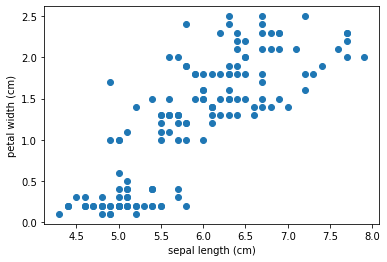

In [3]:
# take a first look at the data

plt.plot(iris.data[:,0], iris.data[:,3], 'o')
plt.ylabel(iris.feature_names[3])
plt.xlabel(iris.feature_names[0])


Text(0.5, 0, 'sepal length (cm)')

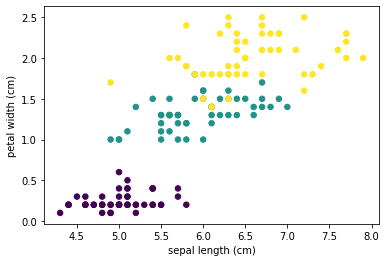

In [4]:
# take another look at the data, this time color-coded by species

plt.scatter(iris.data[:,0], iris.data[:,3], s = 30, c = iris.target)

plt.ylabel(iris.feature_names[3])
plt.xlabel(iris.feature_names[0])


In [5]:
# Feature matrix in a object named X
X = iris.data
# response vector in a object named y
y = iris.target

print(np.shape(X))
print(np.shape(y))

(150, 4)
(150,)


In [6]:
# Split iris data in train and test data (80:20)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [7]:
#check the shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [8]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

# Try running from k=1 through 25 and record testing accuracy
# k is one the model parameters that you can tune to improve the model

k_range = range(1,26)

# initialize empty list to save the accuracy score for each value of k
scores = {}
scores_list = []

# iterate over the range of k values to assess which model preforms best
for k in k_range:
    
        # build the model based on the training data and the given value of k
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        
        
        # predict results from the test data using the model constructed in the previous step
        y_pred=knn.predict(X_test)
        
        # compare the predicted result to the actual value to assess model performance
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'accuracy score')

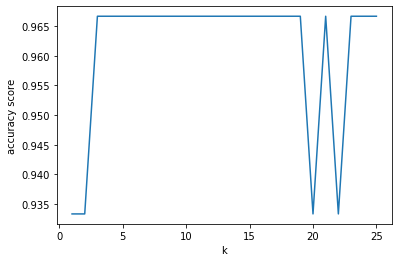

In [9]:
# plot the model accuracy for each value of k

plt.plot(k_range,scores_list)
plt.xlabel('k')
plt.ylabel('accuracy score')

In [10]:
# based on the accuracy achieved above, let's try using k = 5
# here we build a model based on ALL of the data to apply to other data 
# (i.e. not from the test or training set)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
# here we apply the new model built above to 'new' data

#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# Make a prediction for the 'new' data 
# predict for the below two random observations

x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


Text(0.5, 0, 'sepal width (cm)')

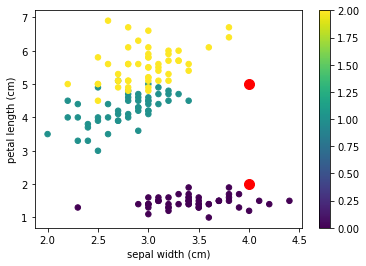

In [12]:
plt.scatter(iris.data[:,1], iris.data[:,2], s = 30, c = iris.target)
plt.colorbar()
plt.plot(np.array(x_new)[:,1], np.array(x_new)[:,2], 'or', markersize = 10)

plt.ylabel(iris.feature_names[2])
plt.xlabel(iris.feature_names[1])
